<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>Классификация текстовых данных</b> </div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Векшин" # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с последующими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>-</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-</b>, вторая неделя и далее до конца модуля <b>-</b>
      </p>
  </div>
</div>

<p><b>Варианты</b></p>

<ol>
    <li>
        Набор электронных сообщений (emails) - <b>спам/не спам</b> - <a href="http://csmining.org/index.php/spam-email-datasets-.html">источник</a> - файл c данными: <b>data/emails.tsv</b>
    </li>
    <li>
        Набор SMS сообщений (sms) - <b>спам/не спам</b> - <a href="https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection">источник</a> - файл c данными: <b>data/SMSSpamCollection</b>
    </li>
    <li>Набор рецензий на фильмы (reviews) - <b>positive/negative</b> - <a href="http://www.cs.cornell.edu/people/pabo/movie-review-data/">источник</a> - файл c данными: <b>data/reviews.tsv</b></li>
</ol>

Использовать DataFrame

<p><b>Задача 1.</b> Классификация текстовых сообщений <b><i>(2 балла)</i></b></p>

<ol>
    <li>Загрузите исходные данные</li>
    <li>Разбейте загруженные данные на обучающее (train, 80%) и тестовое подмножества (test, 20%)</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воспользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр). Примечание: для модели Бернулли используйте бинарный вектор.</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Наивный Байес: модель Бернулли ($\alpha=1$)</li> 
            <li>Наивный Байес: полиномиальная модель ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации на тестовом подмножестве (Accuracy, R, P, F1)</li>
    <li>Определите с время обучения и предсказания (на тестовом подмножестве)</li>
    <li>Свести все значения в один датафрейм и представить результат в виде таблицы</li>
</ol>

In [3]:
random_state = 123  # для всех объектов/методов/моделей

In [4]:
# Параметры логистической регрессии
# penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345
# странно, но однострочное множественное присваивание не сработало, но сработало присваивание через tuple
(penalty, fit_intercept, max_iter, C, solver, logreg_random_state) = ("l2", True, 100, 1, "lbfgs", 12345)
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Ваш код
# 1. Загрузите исходные данные
import pandas as pd

df = pd.read_csv("../data/A3_Text_Classification/emails.tsv", sep='\t', header=None, names=["spam", "content"])
df.dropna(inplace=True) # где-то спряталась одна пустая строчка на 4325 не пустых :-)
df

spam                                            content
0        0  \n\nCONSANTLY being\nbombarded by so-called FR...
1        0  link to my webcam you wanted Wanna see sexuall...
2        1  Re: How to manage multiple Internet connection...
3        0  [SPAM]  Give her 3 hour rodeoEnhance your desi...
4        0  Best Price on the netf5f8m1 (suddenlysusan@Sto...
...    ...                                                ...
4321     0  Aldebaran's Spring Special OfferFrom nobody Su...
4322     1  RE: [ILUG] What HOWTOs for SOHO systemHi Dermo...
4323     1  [Spambayes] hammie.py vs. GBayes.py\n    Guido...
4324     0  \n\r\nborder1 {background-color: #666;}\r\nbor...
4325     0  \r\n>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\...

[4325 rows x 2 columns]

In [6]:
# 2. Разбейте загруженные данные на обучающее (train, 80%) и тестовое подмножества (test, 20%)
from sklearn.model_selection import train_test_split

content_train, content_test, marker_train, marker_test = train_test_split(
    df["content"],
    df["spam"],
    test_size=0.2, 
    random_state=random_state)
content_train.size / len(df), content_test.size / len(df)

(0.8, 0.2)

In [7]:
# 3. Переведите текстовые данные в векторный вид. Для этого воспользуйтесь средствами sklearn для 
# конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр). 
# Примечание: для модели Бернулли используйте бинарный вектор.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, # default=True
                             ngram_range=(1,1), # default=(1, 1)
                             smooth_idf=False # Prevents zero divisions.
                            )
vectorizer = vectorizer.fit(content_train)

content_train_vec = vectorizer.transform(content_train)
content_test_vec = vectorizer.transform(content_test)

# Для модели Бернулли используем бинарный вектор
vectorizer_ber = TfidfVectorizer(use_idf=True, # default=True
                             ngram_range=(1,1), # default=(1, 1)
                             smooth_idf=False, # Prevents zero divisions.
                             binary=True # default=False
                            )                          
vectorizer_ber = vectorizer_ber.fit(content_train)

content_train_vec_binary = vectorizer_ber.transform(content_train)
content_test_vec_binary = vectorizer_ber.transform(content_test)

In [8]:
# 4. Постройте на обучающем подмножестве следующие модели классификации
# 5. Определите качество классификации на тестовом подмножестве (Accuracy, R, P, F1)
# 6. Определите с время обучения и предсказания (на тестовом подмножестве)
import time
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

metrics_task1 = pd.DataFrame(columns=['fit_time', 'score_time', 'accuracy', 'r', 'p', 'f1'],
                      index=['KNN', 'Logistic Regression', 'Bernoulli', 'Multinomial'])

get_model_with_param = {
    "KNN": lambda param : KNeighborsClassifier(n_neighbors=param),
    "Logistic Regression": lambda param : LogisticRegression(penalty=penalty, fit_intercept=fit_intercept,
                                max_iter=max_iter, C=param, solver=solver, random_state=logreg_random_state),
    "Bernoulli": lambda param : BernoulliNB(alpha=param, binarize=None),
    "Multinomial": lambda param : MultinomialNB(alpha=param)
}

train_data = {
    "KNN": content_train_vec,
    "Logistic Regression": content_train_vec,
    "Bernoulli": content_train_vec_binary,
    "Multinomial": content_train_vec
}

test_data = {
    "KNN": content_test_vec,
    "Logistic Regression": content_test_vec,
    "Bernoulli": content_test_vec_binary,
    "Multinomial": content_test_vec
}

default_params = {
    "KNN": 5,
    "Logistic Regression": 5,
    "Bernoulli": C,
    "Multinomial": 1
}

models = {}
for model_name in ["KNN", "Logistic Regression", "Bernoulli", "Multinomial"]:
    models[model_name] = get_model_with_param[model_name](default_params[model_name])
    
    start = time.time()
    models[model_name]  = models[model_name].fit(train_data[model_name], marker_train)
    fit_time = time.time() - start
    metrics_task1['fit_time'][model_name] = fit_time
    
    start = time.time()
    marker_test_pred = models[model_name].predict(test_data[model_name])
    score_time = time.time() - start
    metrics_task1['score_time'][model_name] = score_time
    
    metrics_task1['accuracy'][model_name] = metrics.accuracy_score(marker_test, marker_test_pred)
    metrics_task1['r'][model_name] = metrics.recall_score(marker_test, marker_test_pred)
    metrics_task1['p'][model_name] = metrics.precision_score(marker_test, marker_test_pred)
    metrics_task1['f1'][model_name] = metrics.f1_score(marker_test, marker_test_pred)

In [9]:
# 7. Свести все значения в один датафрейм и представить результат в виде таблицы
metrics_task1

fit_time score_time  accuracy         r         p  \
KNN                  0.001776   0.257432  0.507514  0.291096  0.934066   
Logistic Regression  1.662926   0.000742  0.982659  0.982877  0.991364   
Bernoulli            0.021802   0.019822  0.675145       1.0  0.675145   
Multinomial          0.025493   0.003502  0.820809       1.0  0.790257   

                           f1  
KNN                  0.443864  
Logistic Regression  0.987102  
Bernoulli            0.806073  
Multinomial          0.882842

<p><b>Задача 2.</b> Применение k-folds <b><i>(3 балла)</i></b></p>

<p>Повторите решение задачи 1, но с использованием k-folds (k=4) для разделения исходных данных</p>

In [10]:
random_state = 123  # для всех объектов/методов/моделей

In [11]:
# Ваш код
# 3. Переведите текстовые данные в векторный вид. Для этого воспользуйтесь средствами sklearn для 
# конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр). 
# Примечание: для модели Бернулли используйте бинарный вектор.
from sklearn.model_selection import cross_validate, KFold

vectorizer = TfidfVectorizer(use_idf=True, # default=True
                             ngram_range=(1,1), # default=(1, 1)
                             smooth_idf=False # Prevents zero divisions.
                            )
vectorizer = vectorizer.fit(content_train) 
content_train_vec_full = vectorizer.transform(df["content"]) # исходные данные из условия - все данные

# Для модели Бернулли используем бинарный вектор
vectorizer_ber = TfidfVectorizer(use_idf=True, # default=True
                             ngram_range=(1,1), # default=(1, 1)
                             smooth_idf=False, # Prevents zero divisions.
                             binary=True # default=False
                            )                          
vectorizer_ber = vectorizer_ber.fit(content_train)
content_train_vec_binary_full = vectorizer_ber.transform(df["content"])

markers = df["spam"]

task2_train_data = {
    "KNN": content_train_vec_full,
    "Logistic Regression": content_train_vec_full,
    "Bernoulli": content_train_vec_binary_full,
    "Multinomial": content_train_vec_full
}

kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

In [12]:
# 4. Постройте на обучающем подмножестве следующие модели классификации
# 5. Определите качество классификации на тестовом подмножестве (Accuracy, R, P, F1)
# 6. Определите с время обучения и предсказания (на тестовом подмножестве)
metrics_task2 = {}

models = {}
for model_name in ["KNN", "Logistic Regression", "Bernoulli", "Multinomial"]:
    models[model_name] = get_model_with_param[model_name](default_params[model_name])
    scores = cross_validate(models[model_name], task2_train_data[model_name], markers, cv=kf,
                           scoring=["accuracy","recall","precision","f1"])
    scores = {key: scores[key].mean() for key in scores.keys()}
    metrics_task2[model_name] = scores

In [13]:
# 7. Свести все значения в один датафрейм и представить результат в виде таблицы
metrics_task2_df = pd.DataFrame.from_dict(metrics_task2).transpose()
metrics_task2_df.rename(columns={
    'test_accuracy': 'accuracy',
    'test_precision': 'p',
    'test_recall': 'r',
    'test_f1': 'f1'
})

fit_time  score_time  accuracy         r         p  \
KNN                  0.003936    0.312561  0.452469  0.208604  0.956593   
Logistic Regression  2.072405    0.020106  0.981735  0.985032  0.988042   
Bernoulli            0.020401    0.017250  0.681623  0.999651  0.681706   
Multinomial          0.008594    0.005987  0.825208  0.999323  0.796256   

                           f1  
KNN                  0.338045  
Logistic Regression  0.986533  
Bernoulli            0.810509  
Multinomial          0.886169

<p><b>Задача 3.</b> Выбор модели <b><i>(5 баллов)</i></b></p>

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами: </p>

<p>K-ближайших соседей</p>

In [14]:
import numpy as np
ns = np.arange(1, 150, 20)  # количество соседей

<p>Логистическая регрессия</p>

In [15]:
cs = np.logspace(-2, 10, 8, base=10)  # параметр регуляризации

Наивный Байес: модель Бернулли

In [16]:
alphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр

<p>Наивный Байес: полиномиальная модель </p>

In [17]:
malphas = np.logspace(-4, 1, 8, base=10)  # сглаживающий параметр

<p style="padding-left:15px;">3. Постройте графики (параметры модели)-(доля правильных классификаций) при обучении и валидации <br>
4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать долю правильных классификаций)<br>
5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
6. Повторите шаги 2-4 для n-gram=2 и n-gram=(1,2)<br>
7. Выведите в виде таблицы итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, метрики (Accuracy, R, P, F1))<br>
8. Сделайте выводы по полученным результатам (преимущества и недостатки методов)
</p>

In [18]:
random_state = 123  # для всех объектов/методов/моделей

In [19]:
# Ваш код
# 1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) 
kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

In [20]:
accuracy_scores = {}
def validateAndCollectAccuracyScores(model, model_name, X, Y):
    scores = cross_validate(model, X, Y, cv=kf,
                           scoring=["accuracy"],
                           return_train_score=True)
    scores = {key: scores[key].mean() for key in scores.keys()}
    tmp = accuracy_scores.get(model_name, {"fit":[], "score":[]})
    tmp["fit"] += [scores["train_accuracy"]]
    tmp["score"] += [scores["test_accuracy"]]
    accuracy_scores[model_name] = tmp
    

In [21]:
best_models_metrics = list()
def appendBestScores(model, method, n_gram, param, train_x=content_train_vec, test_x=content_test_vec):
    start = time.time()
    model = model.fit(train_x, marker_train)
    fit_time = time.time() - start

    start = time.time()
    marker_test_pred = model.predict(test_x)
    score_time = time.time() - start

    accuracy = metrics.accuracy_score(marker_test, marker_test_pred)
    r = metrics.recall_score(marker_test, marker_test_pred)
    p = metrics.precision_score(marker_test, marker_test_pred)
    f1 = metrics.f1_score(marker_test, marker_test_pred)

    best_models_metrics.append({
        "method": method, "n_gram": n_gram, "param": param, "fit_time": fit_time,
        "score_time": score_time, "accuracy": accuracy, "r": r, "p": p, "f1": f1
    })

In [22]:
# 2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы
# 3. Постройте графики [сделано в следующей ячейке чтоб не пересчитывать]
# 4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать 
# долю правильных классификаций)
# 5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). 
# Определите время обучения и предсказания (см. задачу 1 п. 6)
# 6. Повторите шаги 2-4 для n-gram=2 и n-gram=(1,2)
accuracy_scores_by_ngram = {}
best_models_metrics = list()

params = {
    "KNN": ns,
    "Logistic Regression": cs,
    "Bernoulli": alphas,
    "Multinomial": malphas
}

n_grams = [(1,1), (2, 2), (1,2)]

for n_gram in n_grams:
    vectorizer = TfidfVectorizer(use_idf=True, # default=True
                             ngram_range=n_gram, # default=(1, 1)
                             smooth_idf=False # Prevents zero divisions.
                            )
    vectorizer = vectorizer.fit(content_train)

    content_train_vec = vectorizer.transform(content_train)
    content_test_vec = vectorizer.transform(content_test)

    # Для модели Бернулли используем бинарный вектор
    vectorizer_ber = TfidfVectorizer(use_idf=True, # default=True
                             ngram_range=n_gram, # default=(1, 1)
                             smooth_idf=False, # Prevents zero divisions.
                             binary=True # default=False
                            )                          
    vectorizer_ber = vectorizer_ber.fit(content_train)

    content_train_vec_binary = vectorizer_ber.transform(content_train)
    content_test_vec_binary = vectorizer_ber.transform(content_test)
    
    task3_train_data = {
        "KNN": content_train_vec,
        "Logistic Regression": content_train_vec,
        "Bernoulli": content_train_vec_binary,
        "Multinomial": content_train_vec
    }

    task3_test_data = {
        "KNN": content_test_vec,
        "Logistic Regression": content_test_vec,
        "Bernoulli": content_test_vec_binary,
        "Multinomial": content_test_vec
    }


    accuracy_scores = {}
    
    for model_name in ["KNN", "Logistic Regression", "Bernoulli", "Multinomial"]:
        for param in params[model_name]:
            model = get_model_with_param[model_name](param)
            validateAndCollectAccuracyScores(model, model_name, task3_train_data[model_name], marker_train)
        accuracy_score = accuracy_scores[model_name]["score"] # достаем метрики из глобальной переменной
        best_param = params[model_name][accuracy_score.index(max(accuracy_score))]
        best_model = get_model_with_param[model_name](best_param)
        appendBestScores(best_model, model_name, n_gram, best_param, 
                        train_x=task3_train_data[model_name], test_x=task3_test_data[model_name])
    
    accuracy_scores_by_ngram[n_gram] = accuracy_scores # сохраняем метрики для дальнейшей отрисовки

In [23]:
def plotme(x_axes, xlabel, model_name, n_gram, ax=None, logx=False):
    ax = ax or plt.gca()
    mydf = pd.DataFrame.from_dict(accuracy_scores[model_name])
    mydf.set_index(x_axes)
    mydf.plot(grid=True, xlabel=xlabel, ylabel="Accuracy", 
              style='-s', logx=logx, title=model_name + " n_gram="+ str(n_gram), ax=ax, kind='line')

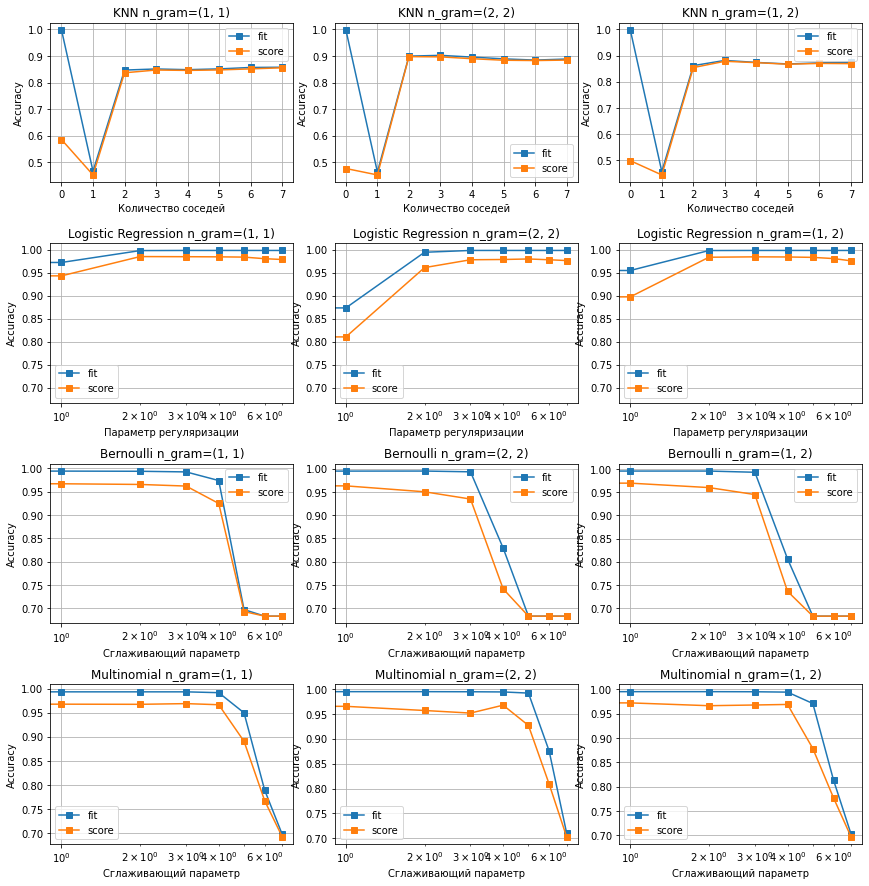

In [24]:
# 3. Постройте графики (параметры модели)-(доля правильных классификаций) при обучении и валидации
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 3)
fig.set_size_inches(12, 12)
fig.tight_layout(h_pad=4)
for idx, n_gram in enumerate(n_grams):
    accuracy_scores = accuracy_scores_by_ngram[n_gram]
    plotme(x_axes=ns, xlabel="Количество соседей", 
           model_name="KNN", n_gram=n_gram, ax=axes[0, idx])
    plotme(x_axes=cs, xlabel="Параметр регуляризации", 
           model_name="Logistic Regression", n_gram=n_gram, ax=axes[1,idx], logx=True)
    plotme(x_axes=alphas, xlabel="Сглаживающий параметр", 
           model_name="Bernoulli", n_gram=n_gram, ax=axes[2, idx], logx=True)
    plotme(x_axes=alphas, xlabel="Сглаживающий параметр", 
           model_name="Multinomial", n_gram=n_gram, ax=axes[3, idx], logx=True)

In [25]:
# 7. Выведите в виде таблицы итоговые данные по всем методам для лучших моделей 
# (метод, n-gram, значение параметра модели, время обучения, время предсказания, метрики (accuracy, R, P, F1))
pd.DataFrame.from_dict(best_models_metrics).sort_values(['accuracy','p'],ascending=False)

method  n_gram         param   fit_time  score_time  \
9   Logistic Regression  (1, 2)  1.389495e+03  15.944626    0.002003   
1   Logistic Regression  (1, 1)  2.682696e+01   1.926917    0.000907   
5   Logistic Regression  (2, 2)  3.727594e+06  14.454843    0.001142   
10            Bernoulli  (1, 2)  1.000000e-04   0.022288    0.021218   
11          Multinomial  (1, 2)  1.000000e-04   0.024246    0.005291   
2             Bernoulli  (1, 1)  5.179475e-04   0.004747    0.003086   
6             Bernoulli  (2, 2)  1.000000e-04   0.016367    0.017788   
7           Multinomial  (2, 2)  1.000000e-04   0.017572    0.003737   
3           Multinomial  (1, 1)  1.389495e-02   0.005420    0.001090   
4                   KNN  (2, 2)  4.100000e+01   0.001908    0.149904   
8                   KNN  (1, 2)  6.100000e+01   0.002378    0.293269   
0                   KNN  (1, 1)  1.410000e+02   0.001459    0.242604   

    accuracy         r         p        f1  
9   0.984971  0.984589  0.993092  0.988822  
1   0.983815  0.982877  0.993080  0.987952  
5   0.982659  0.984589  0.989673  0.987124  
10  0.979191  0.993151  0.976431  0.984720  
11  0.978035  0.993151  0.974790  0.983885  
2   0.976879  0.988014  0.977966  0.982964  
6   0.972254  0.993151  0.966667  0.979730  
7   0.972254  0.993151  0.966667  0.979730  
3   0.969942  0.977740  0.977740  0.977740  
4   0.883237  0.827055  1.000000  0.905342  
8   0.882081  0.830479  0.993852  0.904851  
0   0.857803  0.820205  0.963783  0.886216

##### 8. Сделайте выводы по полученным результатам (преимущества и недостатки методов) 
#### Вывод
Из полученных выше данных наблюдаем, что логит-модель тратит много времени (по сравнению с другими моделями) 
на обучение, но и дает наиболее точные предсказания значений за наименьшее время.

Модели полиномиальной регрессии и Бернулли на демонстрируют схоже-средние показатели по времени обучения, 
предсказания и точности предсказаний.

Метод k ближайших соседей тратит мало времени (по сравнению с другими моделями) 
на обучение, но и дает наименее точные предсказания значений с большими затратами на предсказание.

<p><b>Задача 4. (опционально)</b> Исследование влияния количества признаков FeatureHasher на качество классификации <b><i>(5 баллов к сумме по всем ДЗ)</i></b></p>

<p>Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [26]:
n_features = np.logspace(1, 5, 5, base=10)  # количество признаков
non_negative=True

<p>Можно воспользоваться GridSearchCV</p>

In [27]:
from sklearn.feature_extraction.text import HashingVectorizer

metrics_task4 = {
    key : {
        'fit_time': [],
        'score_time': [], 
        'accuracy' : [], 
        'r' : [], 
        'p' : [], 
        'f1' : []
    } for key in ['KNN', 'Logistic Regression', 'Bernoulli', 'Multinomial']
}

n_features = list(map(int, n_features)) # cast float to int

for nf in n_features:
#     alternate_sign=False == non_negative=True
    vectorizer_h = HashingVectorizer(n_features=nf, alternate_sign=False) # n_gram = (1,1) по дефолту
    content_train_vec_h = vectorizer_h.fit_transform(content_train)
    content_test_vec_h = vectorizer_h.transform(content_test)
    
    vectorizer_ber_h = HashingVectorizer(n_features=nf, binary=True, alternate_sign=False)
    content_train_vec_binary_h = vectorizer_ber_h.fit_transform(content_train)
    content_test_vec_binary_h = vectorizer_ber_h.transform(content_test)
    
    task4_train_data = {
        "KNN": content_train_vec_h,
        "Logistic Regression": content_train_vec_h,
        "Bernoulli": content_train_vec_binary_h,
        "Multinomial": content_train_vec_h
    }

    task4_test_data = {
        "KNN": content_test_vec_h,
        "Logistic Regression": content_test_vec_h,
        "Bernoulli": content_test_vec_binary_h,
        "Multinomial": content_test_vec_h
    }

    for model_name in ["KNN", "Logistic Regression", "Bernoulli", "Multinomial"]:
        model = get_model_with_param[model_name](default_params[model_name])

        start = time.time()
        models[model_name] = model.fit(task4_train_data[model_name], marker_train)
        fit_time = time.time() - start
        metrics_task4[model_name]['fit_time'] += [fit_time]

        start = time.time()
        marker_test_pred = model.predict(task4_test_data[model_name])
        score_time = time.time() - start
        metrics_task4[model_name]['score_time'] += [score_time]
        
        metrics_task4[model_name]['accuracy'] += [metrics.accuracy_score(marker_test, marker_test_pred)]
        metrics_task4[model_name]['r'] += [metrics.recall_score(marker_test, marker_test_pred)]
        metrics_task4[model_name]['p'] += [metrics.precision_score(marker_test, marker_test_pred)]
        metrics_task4[model_name]['f1'] += [metrics.f1_score(marker_test, marker_test_pred)]

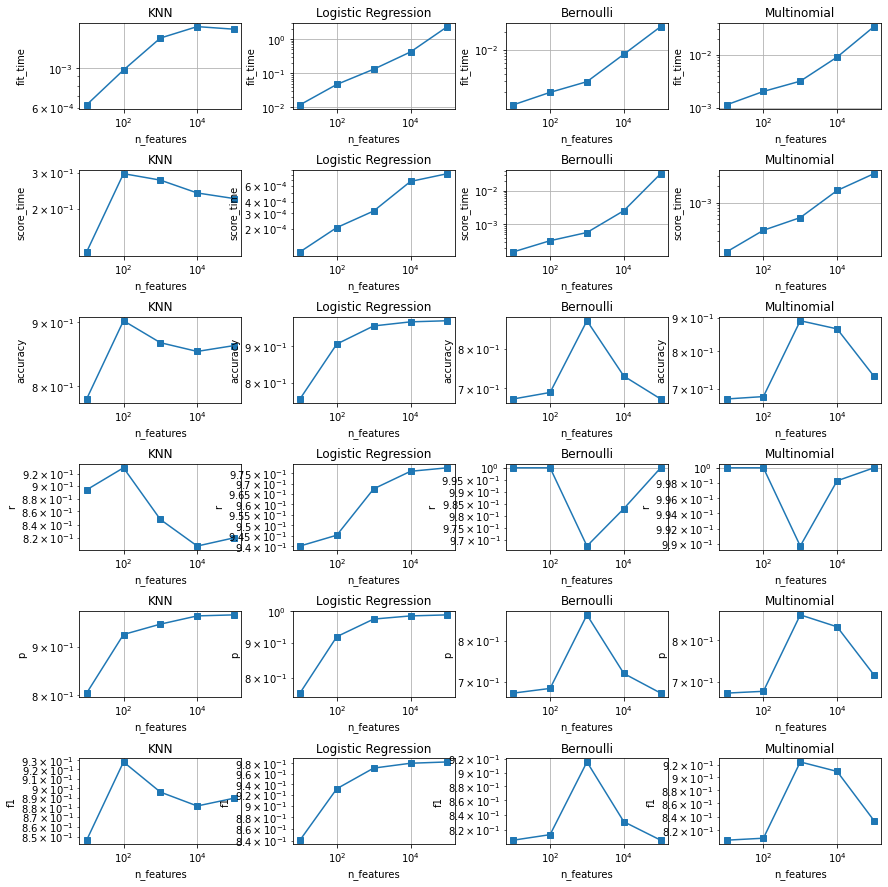

In [28]:
fig, axes = plt.subplots(len(metrics_task4["KNN"].keys()), len(metrics_task4.keys()))
fig.set_size_inches(12, 12)
fig.tight_layout(h_pad=4)

for idx, model_name in enumerate(metrics_task4):
    for idx_sub, metric in enumerate(metrics_task4[model_name]):
        mydf = pd.DataFrame(metrics_task4[model_name][metric], index=n_features)
        mydf.plot(grid=True, xlabel="n_features", ylabel=metric, 
              style='-s', logx=True, logy=True, title=model_name, ax=axes[idx_sub, idx], legend=False)

### Вывод по 4 заданию
При увеличении количества признаков у логит-модели, полиномиальной регрессии и Бернулли моделей наблюдается около-линейное увеличение времени на обучение и предсказание. У метода k ближайших соседей наблюдается рост сложности обучения чуть медленнее линейного, а скорость предсказания становится больше после определённого порка количества признаков (возможно погрешность измерений)

Только у логит-модели наблюдается постоянное увеличение accuracy, recall, f1 при увеличении количества признаков, другие модели после некоторого порога количества признаков начинают больше ошибаться.

У логит-модели и метода k ближайших соседей наблюдается постоянное увеличение точности (precision) при увеличении количества признаков, другие модели после некоторого порога количества признаков начинают больше ошибаться.